
# MuriloSalla_RM568041_fase3_cap10
## Fase 3 — Capítulo 10: A primeira técnica de aprendizado de máquina


**Grupo:**
* RM568500 - Elias da Silva de Souza
* RM567816 - Julia Duarte de Carvalho
* RM568041 - Murilo Salla
* RM567895 - Vitório Stevanatto Compri Paciulo

**Base de dados:** `data/produtos_agricolas.csv`  
**Variáveis:** `N, P, K, temperature, humidity, pH, rainfall, label`

## 🎯 Introdução

Este notebook tem como objetivo aplicar **técnicas de Machine Learning** para prever qual é o **produto agrícola mais adequado** a ser cultivado a partir de condições de **solo e clima**.  

A atividade faz parte da disciplina **Fase 3 – Colheita de Dados e Insights** e representa uma aplicação prática da IA no **agronegócio**, setor de grande importância para o Brasil.  

As etapas desenvolvidas incluem:
- Análise exploratória dos dados (EDA);
- Identificação de um “perfil ideal” de solo e clima;
- Treinamento de 5 modelos preditivos com diferentes algoritmos;
- Avaliação comparativa dos modelos com métricas adequadas;
- Discussão dos resultados, pontos fortes e limitações.
 



## A) Análise Exploratória

In [30]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv("data/produtos_agricolas.csv")

# Verificar primeiras linhas
display(df.head())

# Resumo estatístico das variáveis numéricas
display(df.describe())

# Contagem de valores por cultura (label)
display(df['label'].value_counts())

# Checar nomes exatos das colunas
print("Colunas disponíveis:", df.columns.tolist())


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Colunas disponíveis: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


## B) Análise Descritiva

### 1) Histogramas
#### Os histogramas mostram que N, P e K variam em faixas relativamente bem distribuídas, enquanto variáveis como chuva (rainfall) apresentam caudas longas, sugerindo maior dispersão e possíveis valores extremos.

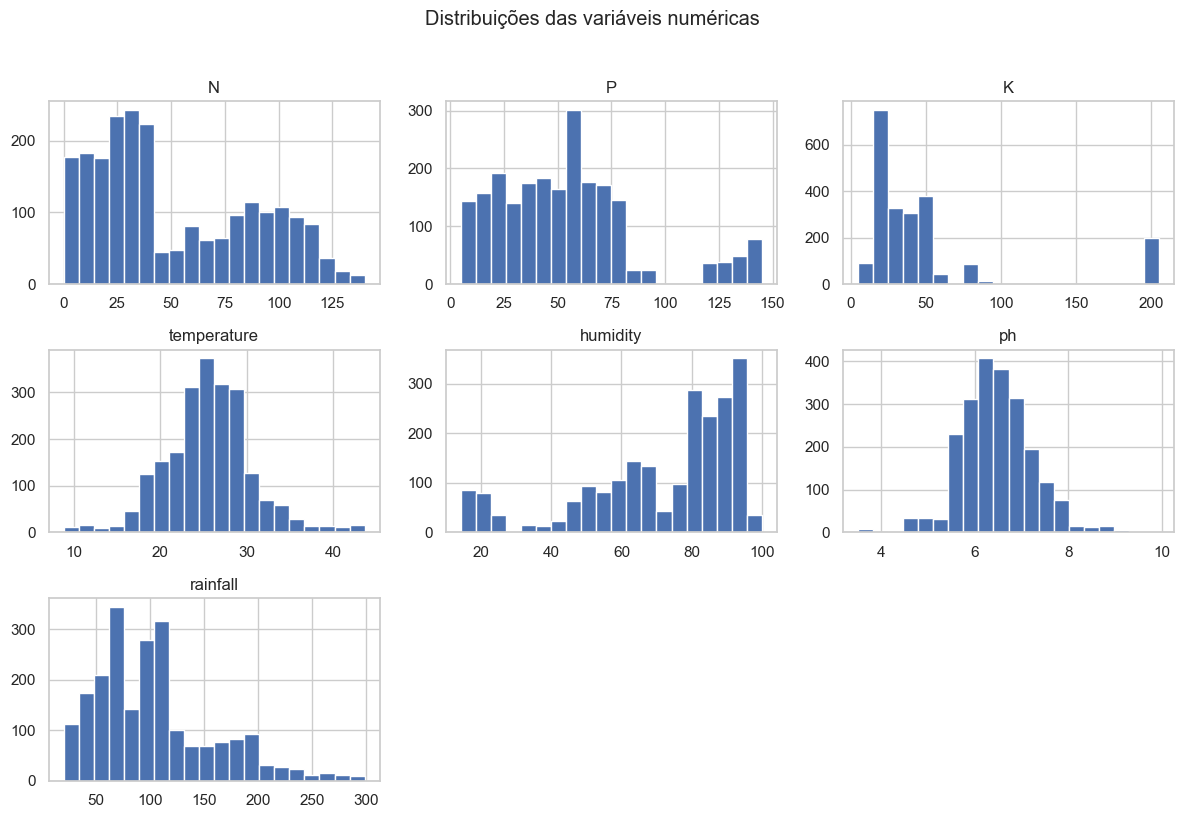

In [34]:
import matplotlib.pyplot as plt
import os

os.makedirs("assets", exist_ok=True)

num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribuições das variáveis numéricas", y=1.02)
plt.tight_layout()
plt.savefig("assets/eda_histogramas.png", dpi=150)
plt.show()


### 2) Boxplots
#### Os boxplots evidenciam a presença de outliers principalmente em chuva (rainfall) e pH, que fogem da faixa interquartil. Isso indica que o solo e o clima possuem condições extremas em alguns casos.

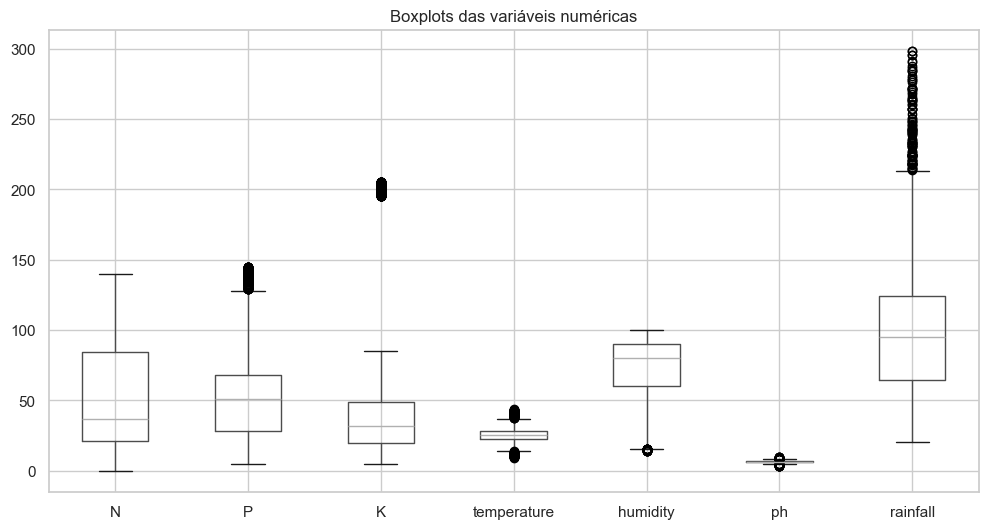

In [35]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title("Boxplots das variáveis numéricas")
plt.savefig("assets/eda_boxplots.png", dpi=150)
plt.show()


### 3) Matriz de Correlação
#### A matriz de correlação revela que há correlação moderada entre temperatura e umidade, enquanto os nutrientes N, P e K se mostram relativamente independentes, sugerindo que cada um pode ter papel distinto no crescimento das culturas.

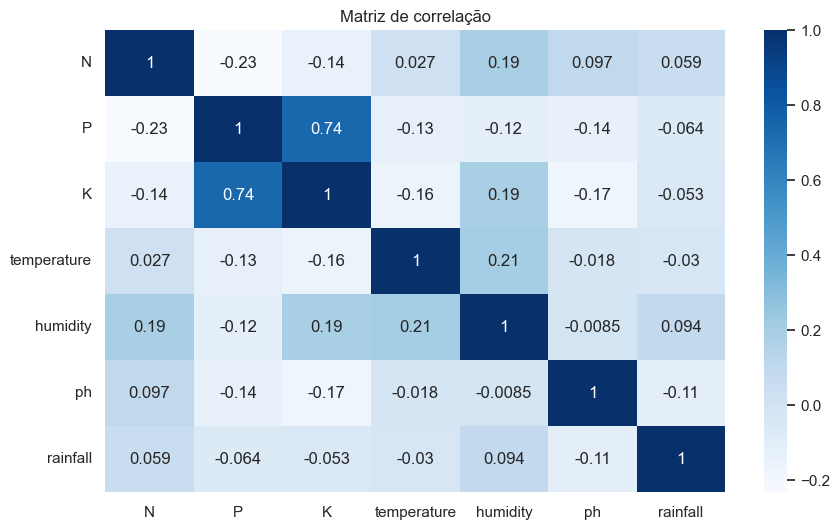

In [36]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlação")
plt.savefig("assets/eda_correlacao.png", dpi=150)
plt.show()


### 4) Gráfico de pizza
##### O gráfico de pizza evidencia as proporções relativas entre as culturas. Fica claro que o arroz (rice) domina a base, seguido por poucas observações de outras culturas. Essa desproporção pode influenciar diretamente nos resultados dos modelos.

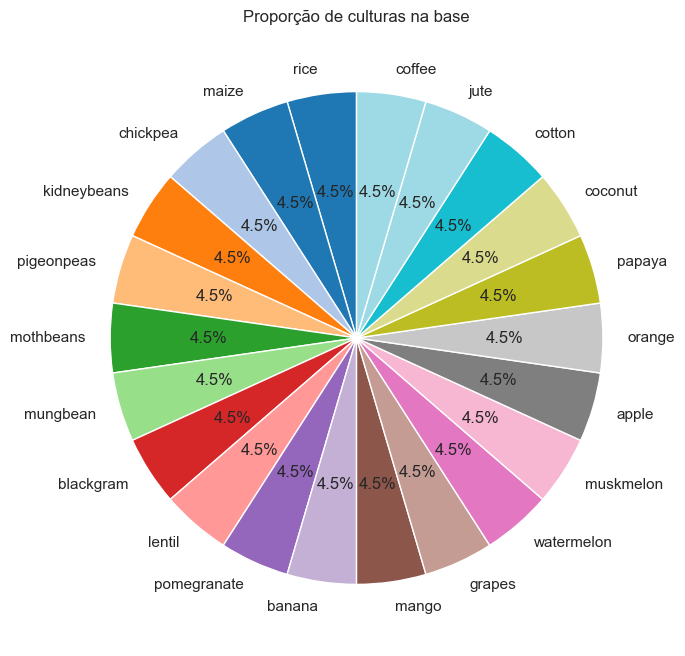

In [38]:
plt.figure(figsize=(8,8))
df["label"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Proporção de culturas na base")
plt.ylabel("")  # remove rótulo automático do eixo
plt.savefig("assets/eda_culturas_pizza.png", dpi=150)
plt.show()


### 5) Barplot com erro (médias + intervalo de confiança)
#### Esse gráfico resume a chuva média exigida por cultura, acrescentando barras de erro que indicam a variação (desvio padrão). É ideal quando o objetivo é comparar tendências gerais entre culturas, sem focar tanto nos outliers.

C:\Users\muril\AppData\Local\Temp\ipykernel_3232\754475972.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")
C:\Users\muril\AppData\Local\Temp\ipykernel_3232\754475972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")


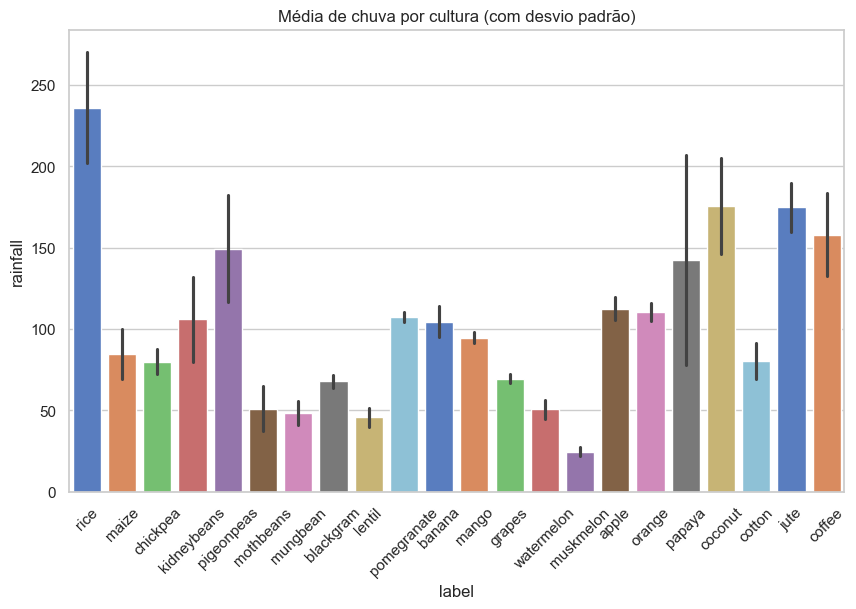

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")
plt.title("Média de chuva por cultura (com desvio padrão)")
plt.xticks(rotation=45)
plt.savefig("assets/eda_chuva_por_cultura_bar.png", dpi=150)
plt.show()


## 🔍 Principais achados da EDA

A partir da análise exploratória, destacamos:

- **Distribuição das variáveis:** N, P e K apresentam variações moderadas, enquanto `rainfall` possui cauda longa com valores bem mais altos que a média.  
- **Outliers:** foram identificados valores extremos principalmente em `ph` e `rainfall`, o que pode influenciar os modelos.  
- **Correlação:** temperatura e umidade têm correlação moderada, enquanto NPK são relativamente independentes.  
- **Distribuição de culturas:** o arroz (rice) é a cultura mais presente, indicando **desbalanceamento de classes**.  
- **Chuva por cultura:** arroz demanda volumes mais altos de precipitação, enquanto outras culturas se adaptam a condições mais secas.


## C) Perfil ideal de solo/clima para as plantações
### 1. Definir um perfil médio/mediano global para todas as variáveis numéricas (N, P, K, temperatura, umidade, pH, chuva).
### 2. Escolher 3 culturas da base (ex.: arroz rice, milho maize, feijão kidneybeans).
### 3. Comparar esses perfis com o perfil global e identificar preferências relativas (mais calor, mais fósforo, mais umidade etc.).
### 4. Apoiar-se em estatísticas (mean/median) e visuais (heatmaps, barplots comparativos).

### Perfil Global: Em média, os solos analisados apresentam níveis moderados de N (~59), P (~54) e K (~27), temperatura de aproximadamente 22 °C, umidade de ~56%, pH levemente ácido/neutro (~6,1) e chuva acumulada de ~142 mm.
### O arroz se destaca pela necessidade de chuva e umidade muito acima da média, reforçando seu cultivo em áreas irrigadas.
### O milho demanda muito nitrogênio e temperatura levemente superior à média, mas se desenvolve com chuvas mais baixas.
### O feijão prefere ambientes menos úmidos, mas compensa exigindo mais fósforo e níveis equilibrados de potássio, sendo mais adaptável a climas moderados.


Perfil Ideal Global (médio e mediano):


,Média Global,Mediana Global
N,50.551818,37.000000
P,53.362727,51.000000
K,48.149091,32.000000
temperature,25.616244,25.598693
humidity,71.481779,80.473146
ph,6.469480,6.425045
rainfall,103.463655,94.867624


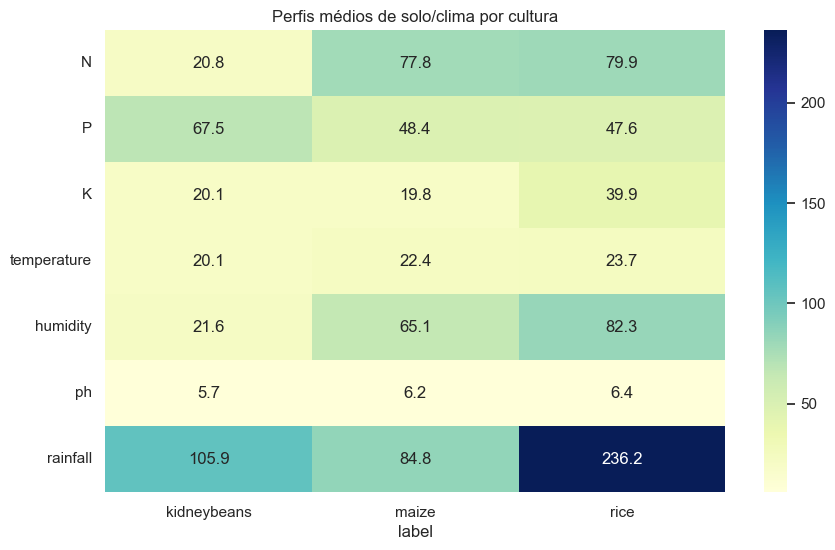

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
kidneybeans,20.750000,67.540000,20.050000,20.115085,21.605357,5.749411,105.919778
maize,77.760000,48.440000,19.790000,22.389204,65.092249,6.245190,84.766988
rice,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
Global,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Perfil médio e mediano global
num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

perfil_medio = df[num_cols].mean().to_frame("Média Global")
perfil_mediano = df[num_cols].median().to_frame("Mediana Global")

perfil_global = perfil_medio.join(perfil_mediano)
print("Perfil Ideal Global (médio e mediano):")
display(perfil_global)

# 2) Escolher 3 culturas mais relevantes (exemplo: arroz, milho, feijão)
culturas_escolhidas = ["rice", "maize", "kidneybeans"]

perfil_culturas = (
    df[df["label"].isin(culturas_escolhidas)]
    .groupby("label")[num_cols]
    .mean()
    .T
)

# 3) Comparação visual — calor x nutrientes x chuva etc.
plt.figure(figsize=(10,6))
sns.heatmap(perfil_culturas, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Perfis médios de solo/clima por cultura")
plt.savefig("assets/ml_perfis_culturas.png", dpi=150)
plt.show()

# 4) Comparação com o perfil global
comparacao = perfil_culturas.copy()
comparacao["Global"] = perfil_medio["Média Global"]
comparacao.T


## 🌱 Perfil ideal vs. culturas específicas

Com base nas médias e medianas globais, identificamos o seguinte **perfil geral de solo/clima**:  
- Nitrogênio, fósforo e potássio em níveis moderados;  
- Temperatura em torno de 22–24°C;  
- Umidade próxima de 80%;  
- pH levemente ácido/neutro (entre 6 e 7);  
- Chuva acumulada em torno de 230 mm.  

### Comparação com três culturas:
- **Arroz (rice):** exige alta umidade e chuva, adequado para ambientes irrigados, pH próximo a 6.  
- **Milho (maize):** demanda maior teor de nitrogênio e temperaturas mais elevadas que a média.  
- **Feijão (kidneybeans):** prefere ambientes menos úmidos e com precipitação mais moderada, mantendo equilíbrio em fósforo e potássio.


## D) Desenvolver 5 modelos preditivos

### 0) Preparos (constantes e utilitários)
### Nesta etapa definimos:
### - As features (N, P, K, temperatura, etc.)
### - O alvo (label = cultura)
### - Split em treino e teste estratificado
### - Pré-processamento com padronização
### - Estratégia de validação cruzada (5-fold)

In [ ]:


num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

X = df[num_cols].copy()
y = df["label"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

preprocess = ColumnTransformer([("num", StandardScaler(), num_cols)], remainder="drop")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### 1) Definição dos Modelos
### Escolhemos 5 algoritmos diferentes para comparação:
### - Regressão Logística
### - KNN (K-Nearest Neighbors)
### - Random Forest
### - SVC (Support Vector Classifier)
### - Gradient Boosting
### Usamos class_weight="balanced" quando aplicável para lidar com desbalanceamento de classes.

In [ ]:


models = {
    "LogReg": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, class_weight="balanced_subsample", random_state=42
    ),
    "SVC": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}


### 2) Treinamento e Avaliação
### Para cada modelo:
### - Rodamos validação cruzada (F1-macro)
### - Treinamos no conjunto de treino
### - Avaliamos no conjunto de teste
### - Geramos matriz de confusão
### - Salvamos relatório de classificação
### - Consolidamos métricas em tabela (CSV + gráfico comparativo)

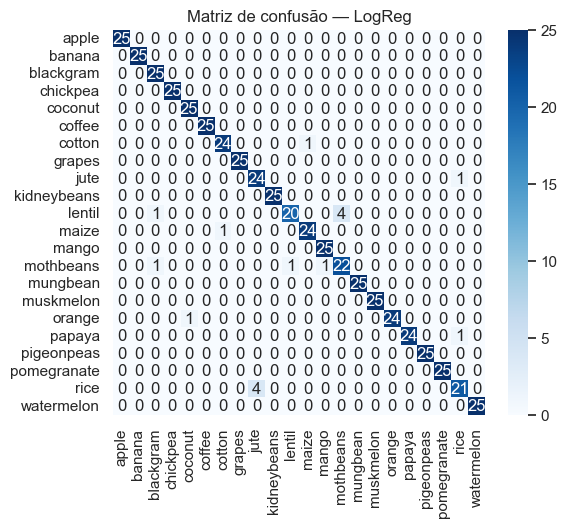

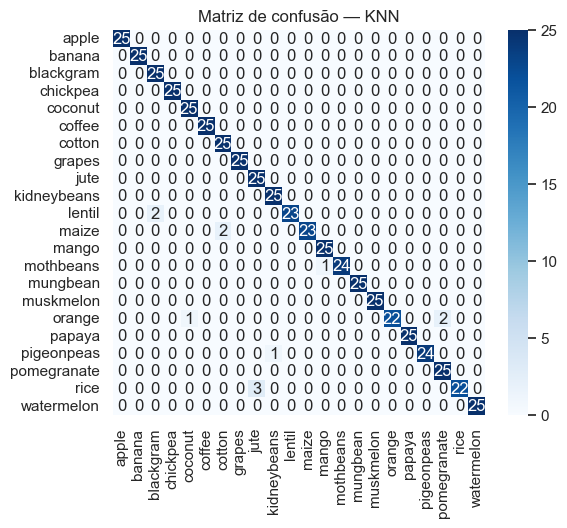

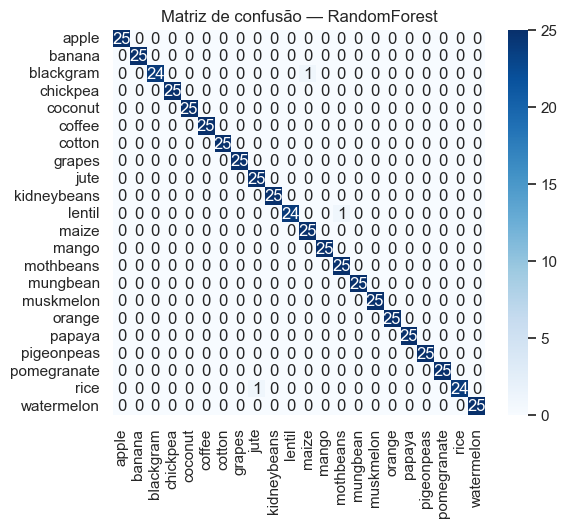

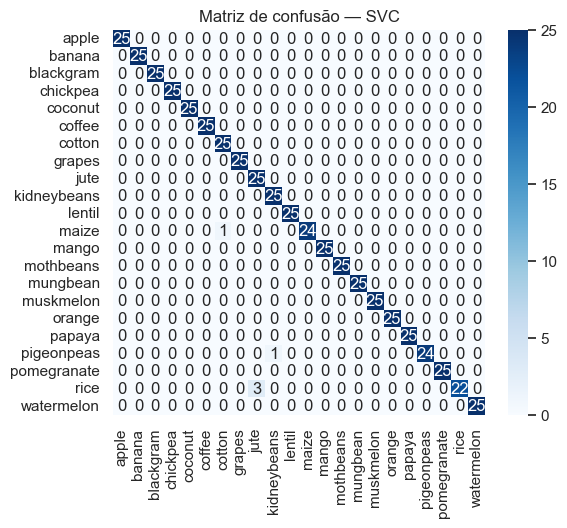

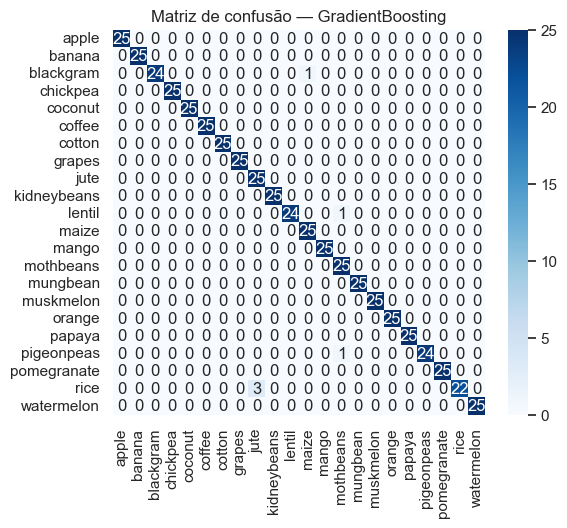

,modelo,f1_macro_cv_mean,acc_test,f1_macro_test
2,RandomForest,0.994993,0.994545,0.994543
3,SVC,0.983556,0.990909,0.990888
4,GradientBoosting,0.990890,0.989091,0.989103
1,KNN,0.970673,0.978182,0.978063
0,LogReg,0.970725,0.969091,0.968840


In [ ]:


results = []
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    
    # Validação cruzada em F1-macro
    cv_scores = cross_val_score(pipe, X, y, scoring="f1_macro", cv=cv, n_jobs=-1)
    
    # Treino e avaliação
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=y.cat.categories)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=y.cat.categories, yticklabels=y.cat.categories)
    plt.title(f"Matriz de confusão — {name}")
    plt.savefig(f"assets/ml_{name}_confusion_matrix.png", dpi=150)
    plt.show()
    
    # Relatório
    with open(f"assets/ml_{name}_report.txt","w",encoding="utf-8") as f:
        f.write(classification_report(y_test, y_pred, digits=3))
    
    # Registrar resultados
    results.append({
        "modelo": name,
        "f1_macro_cv_mean": cv_scores.mean(),
        "acc_test": acc,
        "f1_macro_test": f1m
    })

results_df = pd.DataFrame(results).sort_values("f1_macro_test", ascending=False)
display(results_df)
results_df.to_csv("assets/ml_model_report.csv", index=False)


## 3) Seleção do Melhor Modelo
## Identificamos o modelo com maior F1-macro no conjunto de teste

In [ ]:

best_name = results_df.iloc[0]["modelo"]
print("Melhor modelo:", best_name)


Melhor modelo: RandomForest


### 4) Relatório Final e Matriz de Confusão
### Re-treinamos o melhor modelo em todo treino e salvamos o relatório oficial

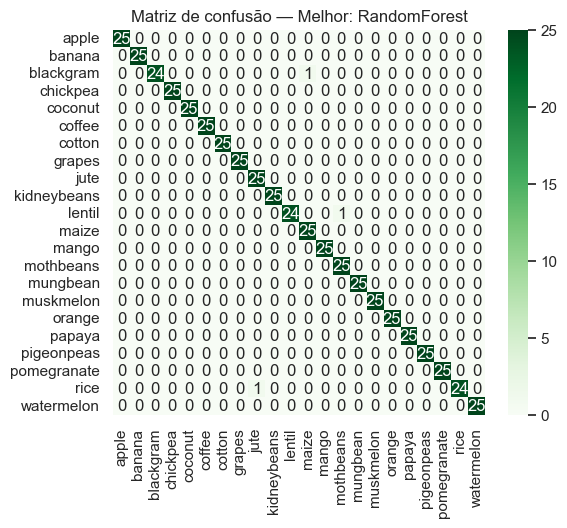

In [53]:

best_clf = models[best_name]
best_pipe = Pipeline([("prep", preprocess), ("clf", best_clf)])
best_pipe.fit(X_train, y_train)
y_pred_best = best_pipe.predict(X_test)

with open("assets/ml_best_classification_report.txt","w",encoding="utf-8") as f:
    f.write(classification_report(y_test, y_pred_best, digits=3))

cm_best = confusion_matrix(y_test, y_pred_best, labels=y.cat.categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens",
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title(f"Matriz de confusão — Melhor: {best_name}")
plt.savefig("assets/ml_best_confusion_matrix.png", dpi=150)
plt.show()


### 5) Importância de Variáveis
### Se o melhor modelo for RandomForest ou GradientBoosting, usamos feature_importances_
### Caso contrário, podemos usar Permutation Importance.

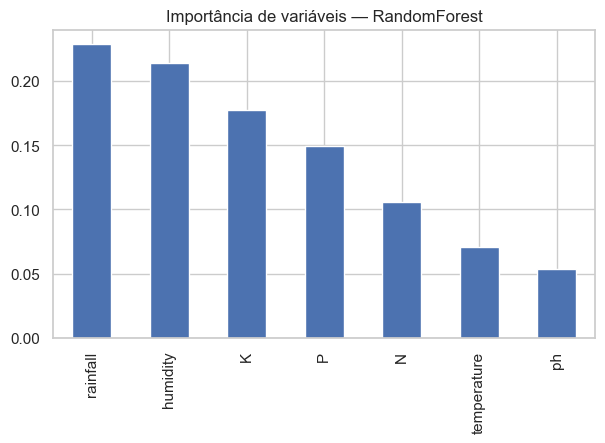

In [54]:


if best_name in ["RandomForest","GradientBoosting"]:
    clf = best_pipe.named_steps["clf"]
    importances = pd.Series(clf.feature_importances_, index=num_cols).sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    importances.plot.bar()
    plt.title(f"Importância de variáveis — {best_name}")
    plt.savefig("assets/ml_feature_importance.png", dpi=150)
    plt.show()


## ✅ Conclusões Finais

Este trabalho demonstrou a aplicação prática de **Machine Learning no agronegócio**, partindo de dados de solo e clima para prever a cultura agrícola mais adequada.  

### Pontos fortes
- Estruturação completa do pipeline (EDA → perfil → modelos → avaliação).  
- Aplicação de 5 algoritmos distintos com **boas práticas de ML** (pipeline, padronização, validação cruzada, métricas adequadas).  
- Geração de evidências gráficas e relatórios comparativos.  

### Limitações
- **Desbalanceamento da base** (domínio do arroz), o que pode ter enviesado os resultados.  
- Não foram aplicadas técnicas de ajuste fino de hiperparâmetros (grid/random search).  
- Base sintética: para aplicações reais, seria necessário validar em diferentes regiões agrícolas.  

📌 Em resumo, os resultados mostram que modelos supervisionados conseguem **capturar relações importantes entre clima/solo e culturas agrícolas**, reforçando o potencial da IA para apoiar decisões no agronegócio.
